In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import scipy.stats as st

In [2]:
# read into pandas
mouse_df = pd.read_csv('Resources/Study_results.csv')
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# removing duplicate mouse IDs with duplicate timepoint, while keeping the highest tumor size at that timespot.
mouse_clean = mouse_df.sort_values('Tumor Volume (mm3)',ascending=False).drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1778,o331,45,78.567014,4
1861,l725,45,76.668817,3
1774,p189,45,75.294936,4
1830,m269,45,75.123690,1
1853,t724,45,75.113288,2


In [4]:
# check if duplicate value was eliminated (YES!)
finder_df = mouse_clean.loc[mouse_clean['Mouse ID']=="g989"]
finder_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1592,g989,35,62.570880,2
1380,g989,30,59.082294,1
1195,g989,25,56.045564,1
950,g989,20,55.326122,1
869,g989,15,53.442020,0
620,g989,10,51.745156,0
329,g989,5,48.786801,0
107,g989,0,45.000000,0


In [5]:
# import second dataset and merge with mouse_clean df
mouse_metadata = pd.read_csv('Resources/Mouse_metadata.csv')
mouse_merged = pd.merge(mouse_clean, mouse_metadata,
                                 how='outer', on='Mouse ID')
mouse_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,o331,45,78.567014,4,Ketapril,Male,24,30
1,o331,40,71.447743,3,Ketapril,Male,24,30
2,o331,35,70.126238,2,Ketapril,Male,24,30
3,o331,30,66.330663,1,Ketapril,Male,24,30
4,o331,25,61.102306,1,Ketapril,Male,24,30


In [6]:
# Group by regimen to find the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

# groupby drug regimen
mouse_regimen = mouse_merged.groupby('Drug Regimen')

# creating each statistic analysis
mouse_regimen_mean = mouse_regimen.mean()['Tumor Volume (mm3)']
mouse_regimen_median = mouse_regimen.median()['Tumor Volume (mm3)']
mouse_regimen_var = mouse_regimen.var()['Tumor Volume (mm3)']
mouse_regimen_stdev = mouse_regimen.std()['Tumor Volume (mm3)']
mouse_regimen_sem = mouse_regimen.sem()['Tumor Volume (mm3)']

# Regimen summary
mouse_regimen_summary = pd.DataFrame({"Mean": mouse_regimen_mean,"Median":mouse_regimen_median,"Variance":mouse_regimen_var,"Stdev":mouse_regimen_stdev,"SEM":mouse_regimen_sem})
mouse_regimen_summary

,Mean,Median,Variance,Stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.407029,50.909965,43.138358,6.567980,0.525859
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Pandas: Total number of measurements using pandas (TABLE)

mouse_regimen_count = mouse_regimen.count()['Mouse ID']
mouse_count_df = pd.DataFrame({"Total Measurements": mouse_regimen_count})
mouse_count_df = mouse_count_df.sort_values(by="Total Measurements",ascending=False)
mouse_count_df = mouse_count_df.reset_index()
mouse_count_df

,Drug Regimen,Total Measurements
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,156


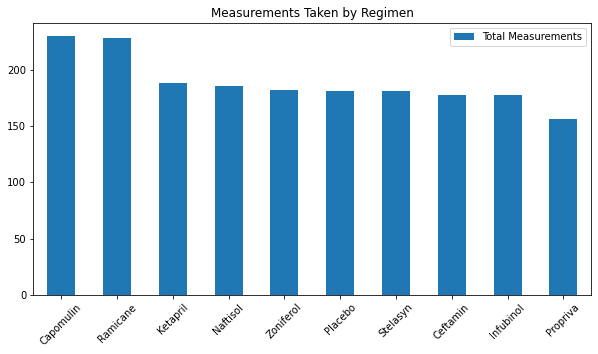

<Figure size 432x288 with 0 Axes>

In [8]:
# Pandas: Total number of measurements using pandas (GRAPH)
mouse_pandas = mouse_count_df.plot(kind="bar",figsize=(10,5))
plt.title("Measurements Taken by Regimen")
mouse_pandas.set_xticklabels(mouse_count_df["Drug Regimen"], rotation=45)

plt.show()
plt.tight_layout()

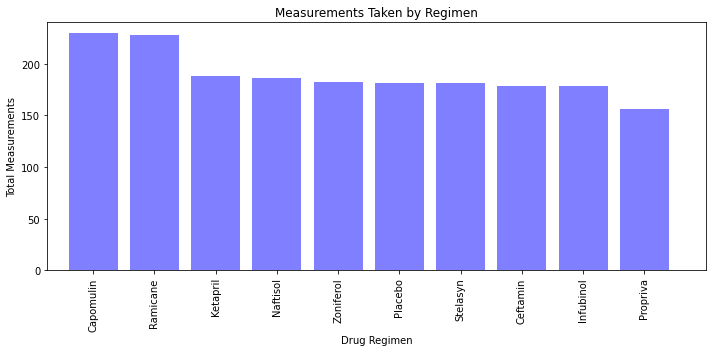

In [9]:
# Matplotlib: Total number of measurements using pandas (TABLE & GRAPH)
x_axis = np.arange(len(mouse_count_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis, mouse_count_df["Total Measurements"], color='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, mouse_count_df["Drug Regimen"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mouse_count_df["Total Measurements"])+10)

plt.title("Measurements Taken by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")

plt.tight_layout()
plt.show()

In [10]:
# Pandas: Distribution of Male vs Female in the study (TABLE)
mouse_gender = mouse_merged.groupby('Sex')
mouse_gender_count = mouse_gender.count()['Mouse ID']
mouse_gender_df = pd.DataFrame({"Total Studies": mouse_gender_count})
mouse_gender_df = mouse_gender_df.sort_values(by="Total Studies",ascending=False)
mouse_gender_df

,Total Studies
Sex,
Male,958
Female,930


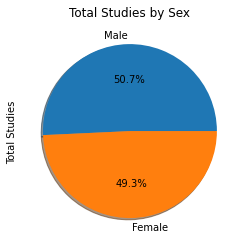

In [11]:
# Pandas: Distribution of Male vs Female in the study (Graph)
gender_pie = mouse_gender_df.plot(kind="pie", y='Total Studies', title="Total Studies by Sex",legend=False, autopct="%1.1f%%", shadow=True)
gender_pie.set_ylabel("Total Studies")
plt.show()


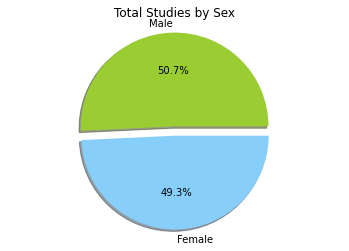

In [12]:
# Matplotlib: Distribution of Male vs Female in the study (Table & Graph)
mouse_gender_df = mouse_gender_df.reset_index()

labels = mouse_gender_df['Sex']
sizes = mouse_gender_df['Total Studies']
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 

plt.title("Total Studies by Sex")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True)

plt.axis('equal')
plt.show()

In [13]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

# filtering regimen selections
regimen_selection = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
filtered_regimen = mouse_merged.loc[mouse_merged['Drug Regimen'].isin(regimen_selection)]
sorted_regimen = filtered_regimen.sort_values(["Timepoint"], ascending=True)
final_table = sorted_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
final_table = final_table.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
final_table

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [14]:
# calculate quartiles for each regimen
# setting data into a dataframe and each regimen as a column
final_table_frame = final_table.to_frame()
final_table_frame.reset_index()
final_table = final_table_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
final_table_df = pd.DataFrame(final_table)
final_table_df_index = final_table_df.reindex(regimen_selection)
tumor_volume = [volume for volume in final_table_df_index['Tumor Volume (mm3)']]

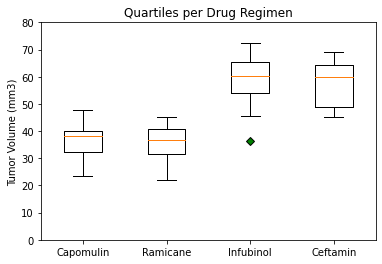

In [15]:
# plotting
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(tumor_volume, labels=regimen_selection,flierprops=green_diamond)
plt.title('Quartiles per Drug Regimen')
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0, 80)
plt.show()


In [16]:
#quartiles, iqr, etc.

final_table = pd.DataFrame({"Capomulin":final_table[0],"Ramicane":final_table[1],"Infubinol":final_table[2],"Ceftamin":final_table[3]})

lowerq = final_table.quantile(0.25)
upperq = final_table.quantile(0.75)
iqr = upperq - lowerq
median = final_table.median()
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

final_table_iqr = pd.DataFrame({"Lower Q": lowerq,"Upper Q": upperq,"InterQ Range": iqr,"Median": median,"Upper Bound":upper_bound,"Lower Bound":lower_bound})
final_table_iqr


# quantile(0.25)

# quartiles = final_table["Capomulin"].quantile([.25,0.5,0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume is: {lowerq}")
# print(f"The upper quartile of tumor volume is: {upperq}")
# print(f"The interquartile range of tumor volume is: {iqr}")
# print(f"The the median of tumor volume is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

,Lower Q,Upper Q,InterQ Range,Median,Upper Bound,Lower Bound
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562
Ramicane,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905
Ceftamin,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664


Text(0, 0.5, 'Tumor Volume (mm3)')

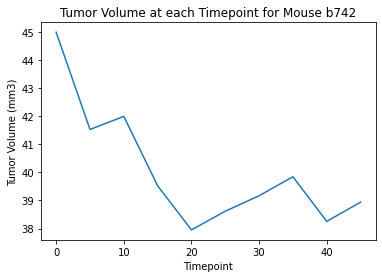

In [17]:
#Select mouse (b742) and generate a line plot of tumor volume vs. time point for that mouse.
filtered_mouse = mouse_merged.loc[mouse_merged['Mouse ID']=='b742']
sorted_filtered_mouse = filtered_mouse.sort_values(["Timepoint"], ascending=True)

ax = plt.gca()
sorted_filtered_mouse.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',ax=ax, legend=False)
plt.title("Tumor Volume at each Timepoint for Mouse b742")
plt.ylabel("Tumor Volume (mm3)")

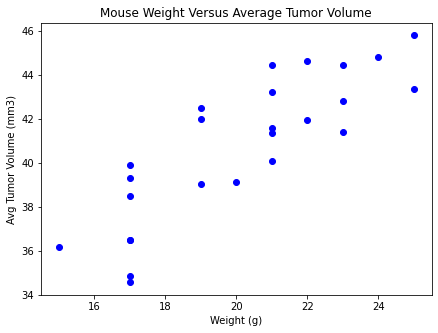

In [18]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

Capomulin_df = mouse_merged.loc[mouse_merged["Drug Regimen"] == "Capomulin",:]

fig1, ax1 = plt.subplots(figsize=(7, 5))
regimen_column =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(regimen_column['Weight (g)'],regimen_column['Tumor Volume (mm3)'], color="b")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')


plt.show()



In [19]:
# Calculate the correlation coefficient
corr=round(st.pearsonr(regimen_column['Weight (g)'],regimen_column['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between weight and the avg. tumor volume (mm3) is {corr}")

The correlation between weight and the avg. tumor volume (mm3) is 0.84


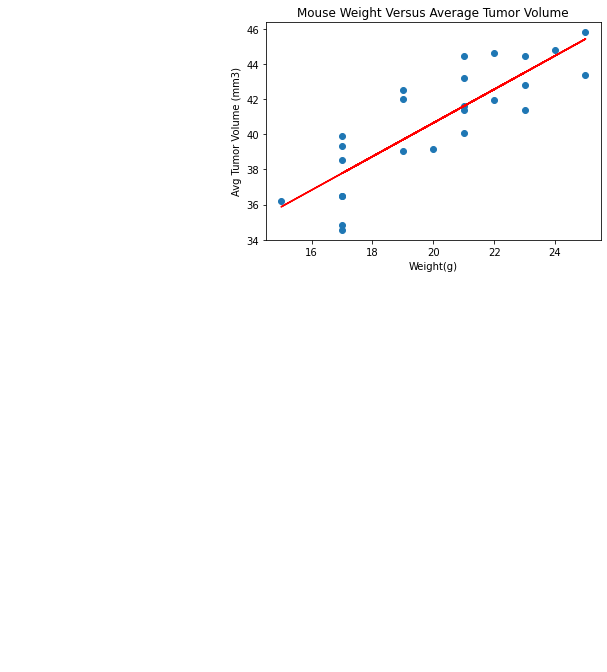

In [20]:
# linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
from scipy.stats import linregress


x_values = regimen_column['Weight (g)']
y_values = regimen_column['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(6,10),fontsize=15,color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()